In [45]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
from imblearn.under_sampling import RandomUnderSampler

In [53]:
train = pd.read_csv('training_data')

In [54]:
X_train = train.drop('output', axis = 1)

In [55]:
len(X_train.columns)

26

In [56]:
y_train = train['output']

In [57]:
test = pd.read_csv('testing_data')

In [62]:
X_test = test.drop('output', axis = 1)

In [65]:
y_test = test['output']

# Model Using Partial Data

In [68]:
from collections import Counter
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under_train, y_under_train = undersample.fit_resample(X_train, y_train)
print("Undersampled class distribution:", Counter(y_under_train))

Undersampled class distribution: Counter({0: 7506, 1: 7506})


In [74]:
model = Sequential()

In [76]:
model.add(Dense(26, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(14, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation = 'sigmoid'))

In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [80]:
early_stop = EarlyStopping(monitor = 'val_loss',mode = 'min' ,patience = 25, verbose= 1, restore_best_weights= True)

In [82]:
model.fit(x = X_under_train, y = y_under_train, validation_data= (X_test, y_test), epochs = 500, verbose = 1, batch_size = 4000, callbacks = [early_stop])

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 7511.4624 - val_loss: 25.4140
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6773.0059 - val_loss: 39.3242
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5187.0308 - val_loss: 71.0103
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4787.4370 - val_loss: 116.0946
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4316.2690 - val_loss: 245.0101
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4735.1870 - val_loss: 1208.7572
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3747.2683 - val_loss: 1693.8217
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3748.1741 - val_loss: 1541.7595
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3873.8323 - val_loss: 1098.0238
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3717.1973 - val_loss: 585.2775
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3302.4402 - val_loss: 117.5684
Epoch 12/500
4/4 ━

In [84]:
losses = pd.DataFrame(model.history.history)

<Axes: >

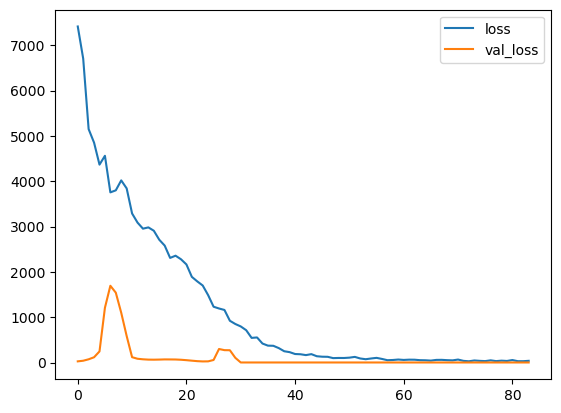

In [86]:
losses.plot()

# Model Using Complete Data

In [89]:
model_complete = Sequential()
model_complete.add(Dense(26, activation = 'relu'))
model_complete.add(Dense(14, activation = 'relu'))
model_complete.add(Dense(1, activation = 'sigmoid'))
model_complete.compile(loss='binary_crossentropy', optimizer='adam')

In [91]:
model_complete.fit(x = X_train, y = y_train, validation_data= (X_test, y_test), epochs = 500, verbose = 1, batch_size = 4000, callbacks = [early_stop])

Epoch 1/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2740.5239 - val_loss: 2.7289
Epoch 2/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 2.9709 - val_loss: 0.4301
Epoch 3/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 8.7611 - val_loss: 3.6210
Epoch 4/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 9.2616 - val_loss: 0.4298
Epoch 5/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 16.2976 - val_loss: 5.2451
Epoch 6/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6017 - val_loss: 1.3814
Epoch 7/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 13.9429 - val_loss: 0.5612
Epoch 8/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 7.7201 - val_loss: 0.8464
Epoch 9/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 8.8502 - val_loss: 0.3565
Epoch 10/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 6.1991 - val_loss: 2.8096
Epoch 11/500
325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 7.7161 - val_loss: 4.0642
Epoch 12/500
325/3

### As we can see that while using complete un-undersampled data, the validation data and the loss are both very low, but that is owning to the fact that the majority of data points in both data sets are those corresponding to "NON-FRAUD". Hence, to truly test the validity of these models we need to test them on data sets where both "Fraud" and "Non-Fraud" data points are in comparable ratio

In [94]:
X_under_test, y_under_test = undersample.fit_resample(X_test, y_test)
print("Undersampled class distribution:", Counter(y_under_test))

Undersampled class distribution: Counter({0: 2145, 1: 2145})


In [96]:
prediction_model = model.predict(X_under_test)

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step


In [98]:
prediction_model_complete = model_complete.predict(X_under_test)

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step


In [100]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#### Metrics of model 1

In [103]:
prediction_model

array([[0.4821741],
       [0.4821741],
       [0.4821741],
       ...,
       [0.4821741],
       [0.4821741],
       [0.4821741]], dtype=float32)

In [105]:
predictions_model1 = []
for i in range(len(prediction_model)):
    if prediction_model[i][0] > 0.5:
        prediction_model[i][0] = int(1)
        predictions_model1.append(prediction_model[i][0]) 
    else:
        prediction_model[i][0] = int(0)
        predictions_model1.append(prediction_model[i][0])

In [109]:
print(classification_report(y_under_test, predictions_model1))
print(confusion_matrix(y_under_test, predictions_model1))
print(roc_auc_score(y_under_test,predictions_model1))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2145
           1       0.00      0.00      0.00      2145

    accuracy                           0.50      4290
   macro avg       0.25      0.50      0.33      4290
weighted avg       0.25      0.50      0.33      4290

[[2144    1]
 [2145    0]]
0.49976689976689975


#### Metrics of Model 2

In [113]:
predictions_model2 = []
for i in range(len(prediction_model_complete)):
    if prediction_model_complete[i][0] > 0.5:
        prediction_model_complete[i][0] = int(1)
        predictions_model2.append(prediction_model_complete[i][0]) 
    else:
        prediction_model_complete[i][0] = int(0)
        predictions_model2.append(prediction_model_complete[i][0])

In [115]:
print(classification_report(y_under_test, predictions_model2))
print(confusion_matrix(y_under_test, predictions_model2))
print(roc_auc_score(y_under_test,predictions_model2))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      2145
           1       1.00      0.51      0.68      2145

    accuracy                           0.76      4290
   macro avg       0.84      0.76      0.74      4290
weighted avg       0.84      0.76      0.74      4290

[[2145    0]
 [1044 1101]]
0.7566433566433566
